# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import time
import pandas as pd
from config import api_key
from citipy import citipy
import numpy as np
import ipywidgets as widgets
from pprint import pprint
import matplotlib.patches as mpatches 
import json
import random
import seaborn as sns
from scipy.stats import linregress
import os
from urllib.error import HTTPError
from urllib.parse import quote_plus
from datetime import datetime

# Import API key
# from api_keys import api_key
temp_units = "imperial"

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

In [2]:
lat_range = (-90,90)
lng_range = (-180,180)
lat_lngs = []
cities = []
lats = np.random.uniform(low=-90,high=90,size=1500)
lngs = np.random.uniform(low=-180,high=180,size=1500)
lat_lngs = zip(lats,lngs)
for lat_lng in lat_lngs:
    city=citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

598

In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | saint-pierre
Processing Record 3 of Set 1 | nerja
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | baturaja
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | tabou
Processing Record 11 of Set 1 | saint-francois
Processing Record 12 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | jinxiang
Processing Record 15 of Set 1 | linjiang
Processing Record 16 of Set 1 | belyy yar
Processing Record 17 of Set 1 | cape town
City not found. Skipping...
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | agogo
Processing Record 20 of Set 1 | galveston
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | srednekolymsk
City not found. Skipping...
Processing R

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:

# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mar del plata,20,ES,1604024384,93,43.40,-4.01,55.99,2.24
1,saint-pierre,75,RE,1604024384,56,-21.34,55.48,69.80,14.99
2,nerja,0,ES,1604024384,77,36.76,-3.89,59.00,3.22
3,mataura,100,NZ,1604024384,91,-46.19,168.86,61.00,1.99
4,bathsheba,40,BB,1604024385,88,13.22,-59.52,80.60,23.04


In [7]:
# output data to csv
weather_dataframe.to_csv("output_data_file.csv",encoding="utf-8",index=False)

In [8]:

weather_dataframe.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [9]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mar del plata,20,ES,1604024384,93,43.40,-4.01,55.99,2.24
1,saint-pierre,75,RE,1604024384,56,-21.34,55.48,69.80,14.99
2,nerja,0,ES,1604024384,77,36.76,-3.89,59.00,3.22
3,mataura,100,NZ,1604024384,91,-46.19,168.86,61.00,1.99
4,bathsheba,40,BB,1604024385,88,13.22,-59.52,80.60,23.04


In [10]:
# Switch to seaborn default display
sns.set()

In [11]:
# Get current date
cur_date = datetime.now()

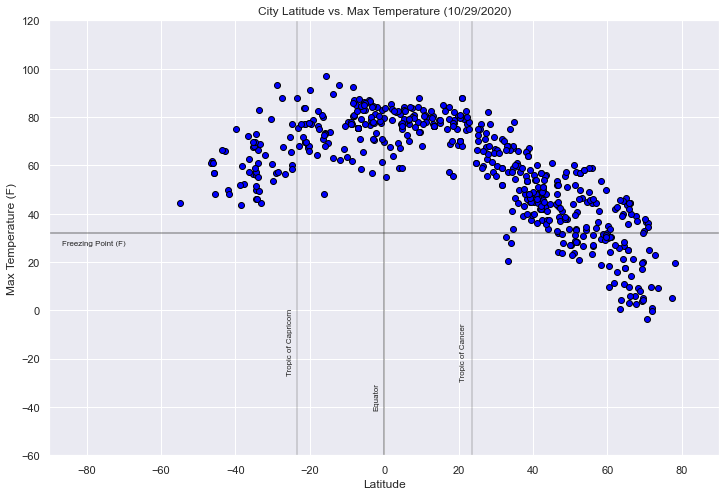

In [12]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Max Temp'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-60, 120)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.axhline(32, c='k', alpha=.4)
plt.title('City Latitude vs. Max Temperature (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.gcf().text(.14, .49, 'Freezing Point (F)', fontsize=8, rotation='horizontal')
plt.savefig("figures/fig1.png")
plt.show()

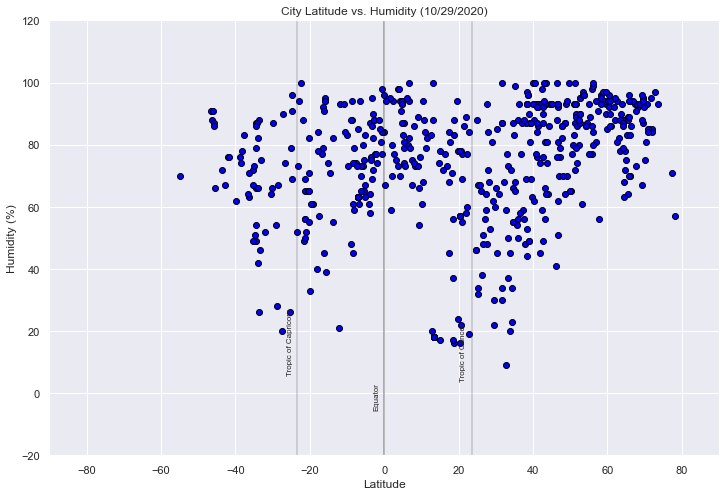

In [24]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Humidity'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig2.png")
plt.show()

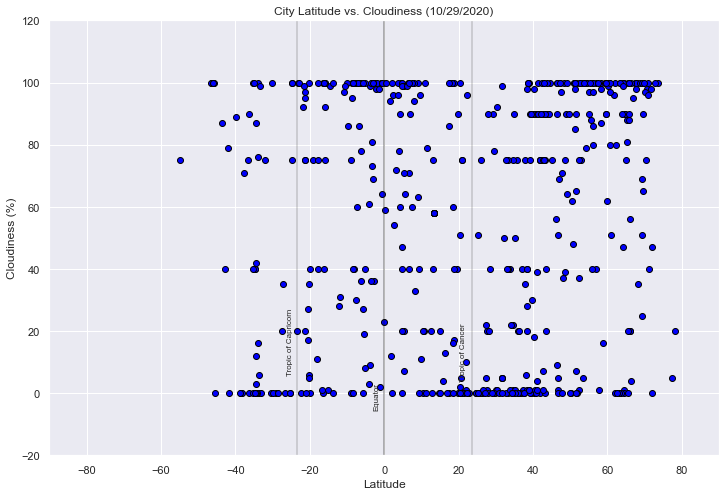

In [25]:
# create graph
plt.figure(figsize = (12, 8))                                               
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Cloudiness'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig3.png")
plt.show()

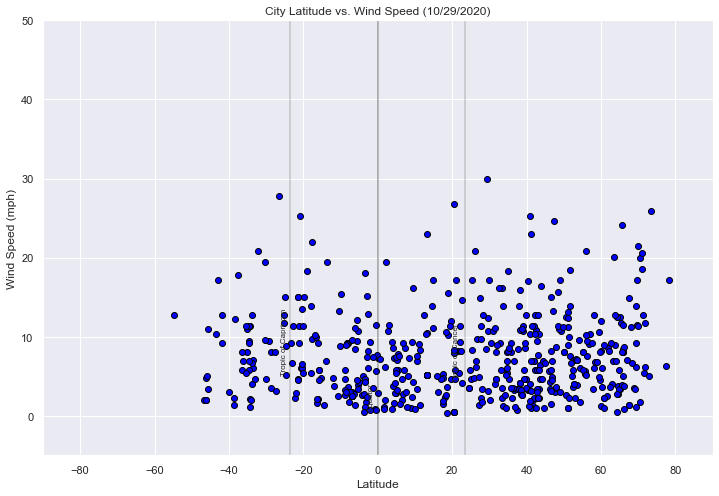

In [26]:

# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Wind Speed'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig4.png")
plt.show()

In [27]:

# create dataframe for all the cities
weather_dataframe['temp_v'] = "xkcd:dark purple"                                     
weather_dataframe.loc[weather_dataframe['Max Temp'] > 0, 'temp_v'] = "xkcd:violet"           
weather_dataframe.loc[weather_dataframe['Max Temp'] > 10, 'temp_v'] = "xkcd:indigo blue"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 20, 'temp_v'] = "xkcd:blue"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 30, 'temp_v'] = "xkcd:green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 40, 'temp_v'] = "xkcd:sea green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 50, 'temp_v'] = "xkcd:yellow green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 60, 'temp_v'] = "xkcd:yellow"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 70, 'temp_v'] = "xkcd:orange"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 80, 'temp_v'] = "xkcd:reddish orange"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 90, 'temp_v'] = "xkcd:red"

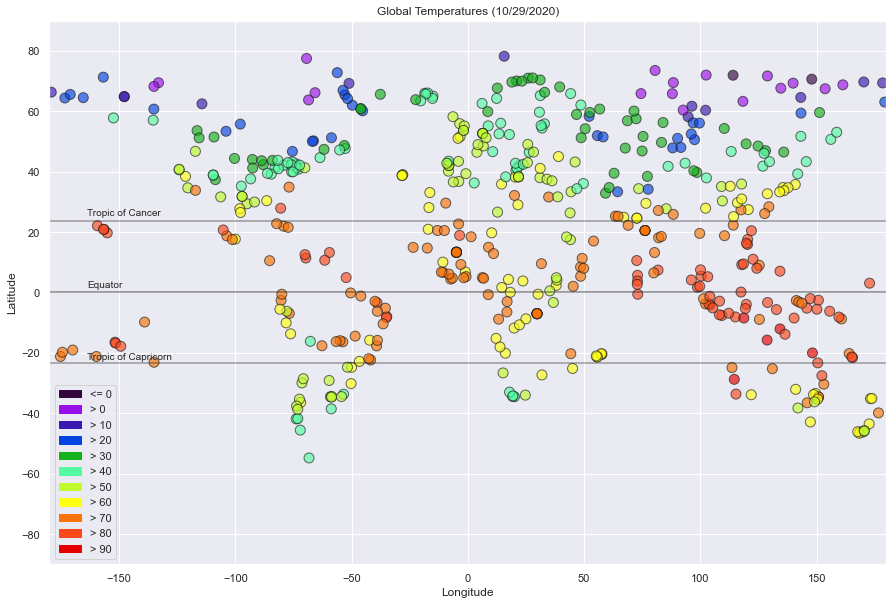

In [28]:
# create graph
fig = plt.figure(figsize=(15,10))                                           
ax = fig.add_subplot(1,1,1)
ax.scatter(weather_dataframe['Lng'], weather_dataframe['Lat'], color=weather_dataframe["temp_v"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Temperatures (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

templt0 = mpatches.Patch(color='xkcd:dark purple', label='<= 0')
tempgt0 = mpatches.Patch(color='xkcd:violet', label='> 0')
tempgt10 = mpatches.Patch(color='xkcd:indigo blue', label='> 10')
tempgt20 = mpatches.Patch(color='xkcd:blue', label='> 20')
tempgt30 = mpatches.Patch(color='xkcd:green', label='> 30')
tempgt40 = mpatches.Patch(color='xkcd:sea green', label='> 40')
tempgt50 = mpatches.Patch(color='xkcd:yellow green', label='> 50')
tempgt60 = mpatches.Patch(color='xkcd:yellow', label='> 60')
tempgt70 = mpatches.Patch(color='xkcd:orange', label='> 70')
tempgt80 = mpatches.Patch(color='xkcd:reddish orange', label='> 80')
tempgt90 = mpatches.Patch(color='xkcd:red', label='> 90')

plt.legend(handles=[templt0,
                    tempgt0,
                    tempgt10,
                    tempgt20,
                    tempgt30,
                    tempgt40,
                    tempgt50,
                    tempgt60,
                    tempgt70,
                    tempgt80,
                    tempgt90], frameon=True, loc="lower left")
plt.savefig("figures/fig5.png")
plt.show()  

In [13]:
# Linear Regression - Northern Hemisphere - Temperature (F) vs. Latitude
# Linear Regression - Southern Hemisphere - Temperature (F) vs. Latitude
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [14]:
# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save a CSV of all retrieved data and a PNG image for each scatter plot.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_dataframe_humidity = weather_dataframe.loc[(weather_dataframe['Humidity'])>100].count()
weather_dataframe_humidity

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [16]:
#  Get the indices of cities that have humidity over 100%.


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

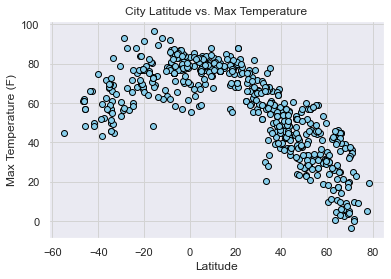

In [18]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

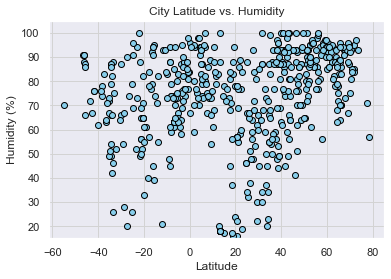

In [19]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

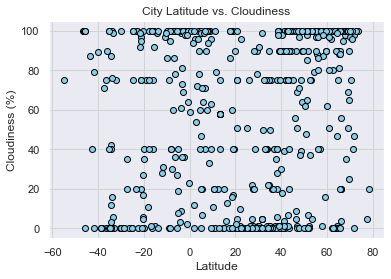

In [20]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

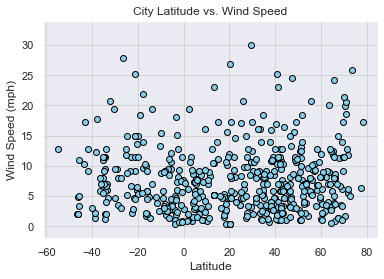

In [21]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.94x + 87.93
The r-squared is: -0.8645354201119171


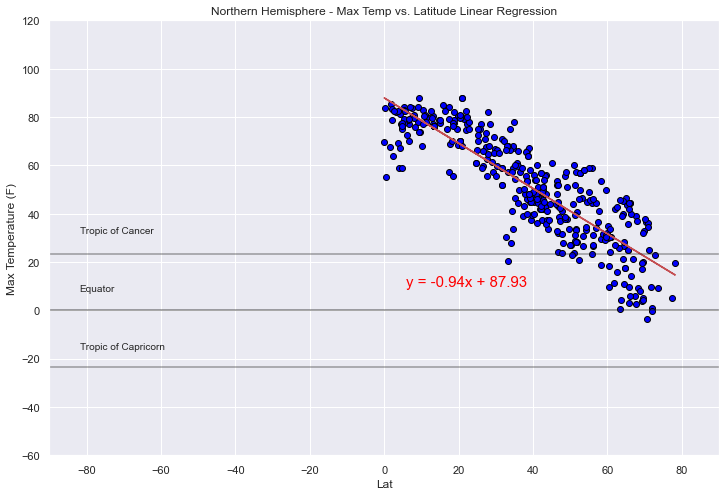

In [23]:
# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig6.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.54x + 81.69
The r-squared is: 0.6274055333450973


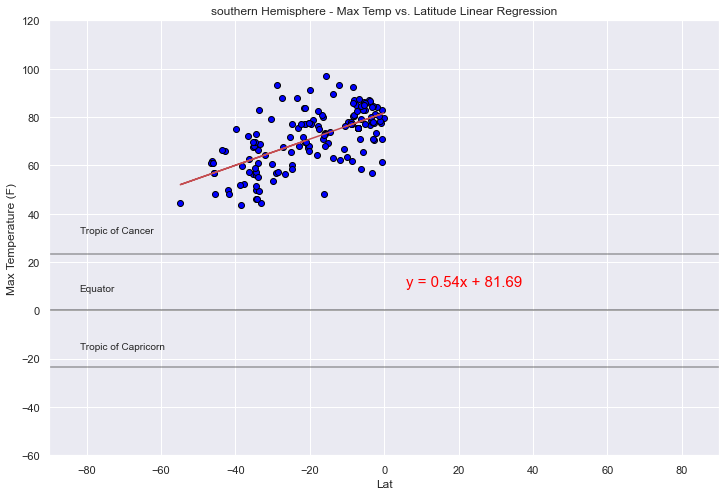

In [29]:
# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig7.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 62.96
The r-squared is: 0.32531874378026926


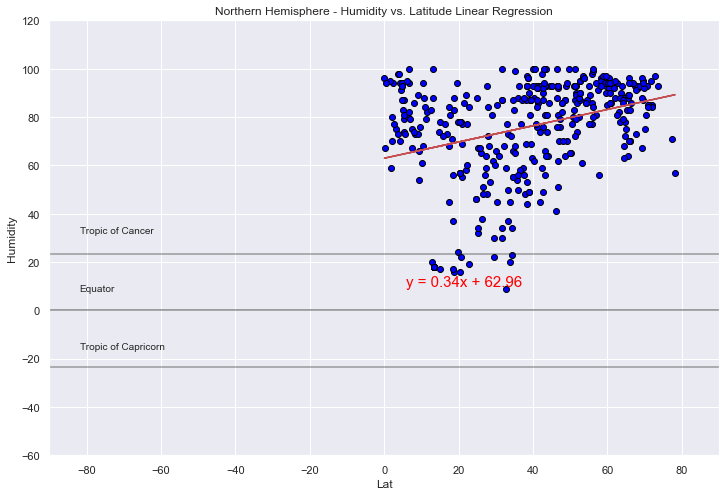

In [30]:

# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig8.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 73.68
The r-squared is: 0.11203485891264946


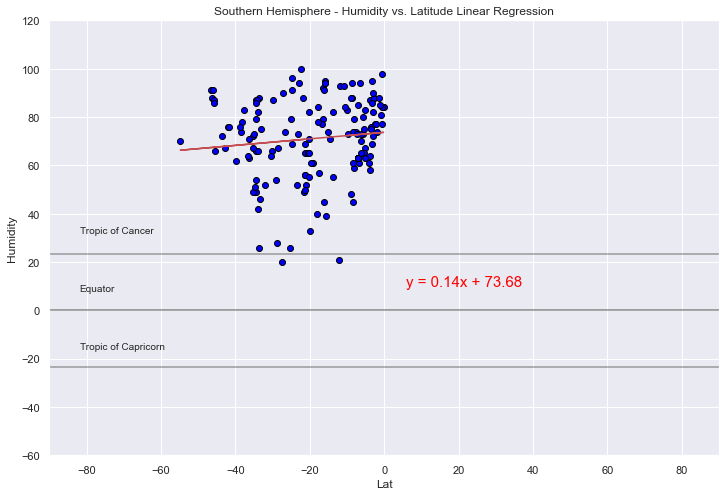

In [31]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig9.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.45x + 37.49
The r-squared is: 0.22183557279684712


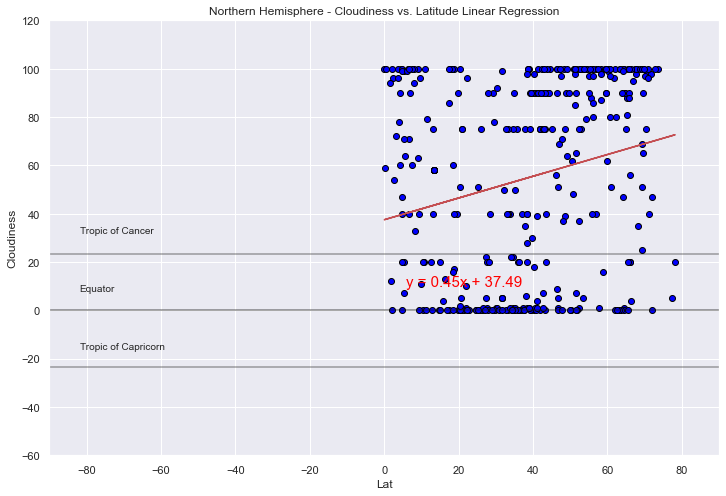

In [32]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig10.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.63x + 70.37
The r-squared is: 0.20973692740512082


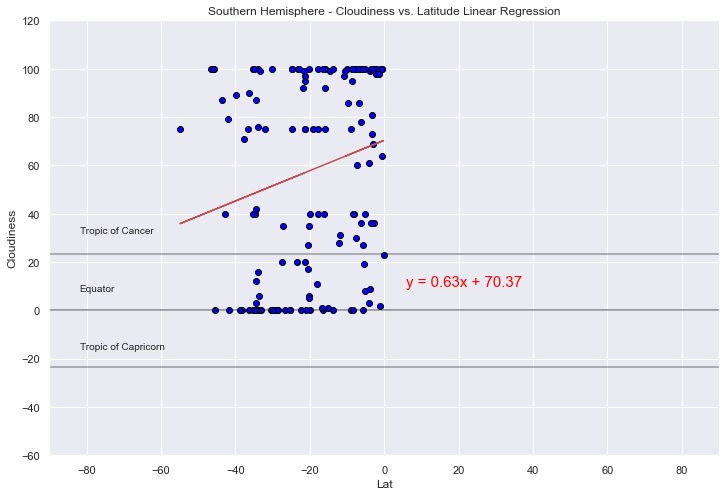

In [33]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig11.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.15
The r-squared is: 0.1255827613872675


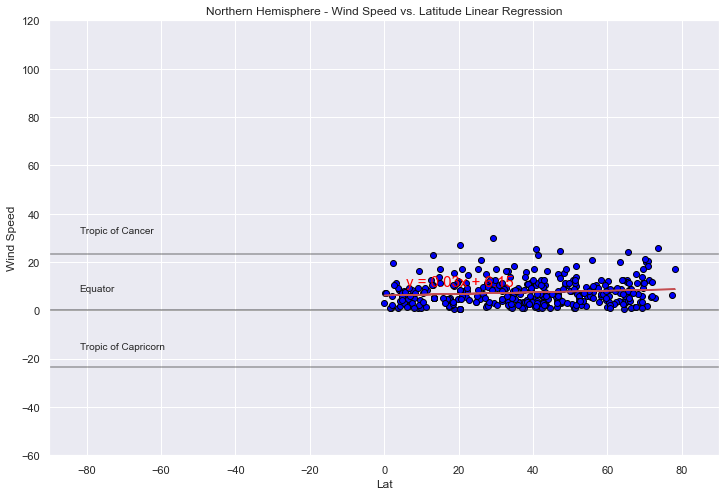

In [36]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig12.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 6.16
The r-squared is: -0.1801077782895086


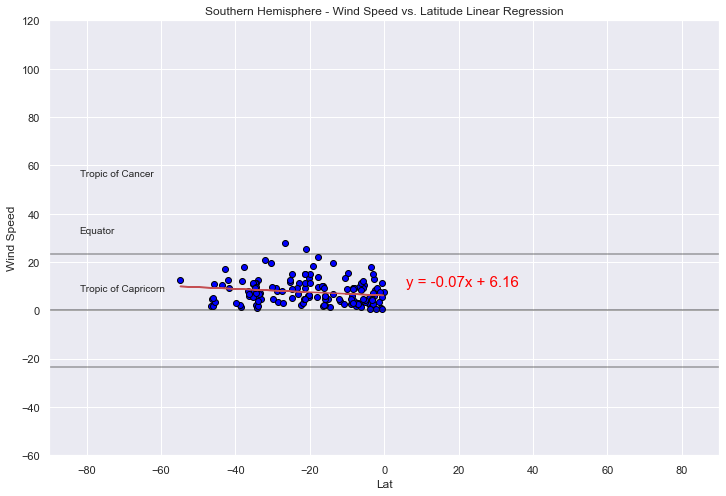

In [35]:

# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig13.png")
plt.show()